In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("clean_vehicles.csv")
data.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
0,28900,2009.0,cadillac,excellent,8,gas,61000.0,clean,automatic,rwd,sedan
1,8000,2010.0,ford,like new,8,other,122000.0,clean,automatic,rwd,van
2,41500,2016.0,ford,good,8,diesel,130555.0,clean,automatic,4wd,truck
3,11950,2009.0,ford,excellent,8,gas,140000.0,clean,automatic,4wd,truck
4,9333,2016.0,jeep,excellent,4,gas,74783.0,clean,automatic,fwd,SUV


In [3]:
target = data.pop("price")
features = data

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7448 non-null   float64
 1   manufacturer  7448 non-null   object 
 2   condition     7448 non-null   object 
 3   cylinders     7448 non-null   int64  
 4   fuel          7448 non-null   object 
 5   odometer      7448 non-null   float64
 6   title_status  7448 non-null   object 
 7   transmission  7448 non-null   object 
 8   drive         7448 non-null   object 
 9   type          7448 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 582.0+ KB


In [5]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.3)

In [6]:
categorical_preproc = OneHotEncoder(handle_unknown="ignore")
categorical_feature_list =  [
    "manufacturer",
    "condition",
    "fuel",
    "title_status",
    "transmission",
    "drive",
    "type"
    
]

numerical_preprocessing = StandardScaler()
numerical_feature_list= [
    "year", 
    "cylinders",
    "odometer",
]

In [7]:
preproc = ColumnTransformer(
    transformers=[
        ("cat_transform", categorical_preproc, categorical_feature_list),
        ("num_transform", numerical_preprocessing, numerical_feature_list)
    ],
)

In [8]:


pipe = make_pipeline(preproc, LinearRegression())
pipe.fit(train_features, train_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_transform',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'condition',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type']),
                                                 ('num_transform',
                                                  StandardScaler(),
                                                  ['year', 'cylinders',
                                                   'odometer'])])),
                ('linearregression', LinearRegression())])

In [9]:
predictions = pipe.predict(train_features)

mae_metric = mean_absolute_error(train_target, predictions)
rmse_metric = mean_squared_error(train_target, predictions, squared=False)

print(f"Mean Absolute Error: {mae_metric:.2f}")
print(f"Root Mean Squared Error: {rmse_metric:.2f}")

Mean Absolute Error: 5120.71
Root Mean Squared Error: 7915.09


In [10]:
predictions = pipe.predict(test_features)

mae_metric = mean_absolute_error(test_target, predictions)
rmse_metric = mean_squared_error(test_target, predictions, squared=False)

print(f"Mean Absolute Error: {mae_metric:.2f}")
print(f"Root Mean Squared Error: {rmse_metric:.2f}")

Mean Absolute Error: 5411.56
Root Mean Squared Error: 10621.88


In [11]:
pipe['linearregression'].coef_

array([-3.21503788e+03,  7.77297812e+03, -1.97628737e+03, -2.63578066e+03,
       -1.73455932e+03, -1.20456094e+02, -2.25679024e+03, -3.70060349e+03,
        8.10908535e+03, -4.17663345e+03, -4.17015757e+03, -2.51910765e+03,
       -1.01579716e+03, -2.67346691e+03, -3.18561784e+03, -3.93248391e+03,
       -2.84018728e+02,  1.27589622e+01, -3.23386185e+03, -8.12917176e+02,
       -1.84569567e+03, -3.55179019e+03, -6.87260445e+02, -3.92184688e+03,
       -4.31411048e+03, -5.47776453e+03, -3.22940530e+03, -2.45607771e+03,
        1.44388884e+04, -3.11026165e+03,  8.67564390e+03, -4.99057524e+03,
       -2.21794528e+03,  4.64556185e+04, -1.15455840e+03, -3.56146871e+03,
       -3.30263538e+03, -1.54056264e+03, -6.28282876e+03, -2.17312604e+03,
        1.68838864e+03,  1.49400727e+04, -6.63194385e+03,  4.84368759e+03,
        2.02531046e+03, -2.55653521e+03, -2.49738225e+03, -1.81508059e+03,
       -2.12177309e+03,  1.93349486e+03,  9.11203567e+03, -2.81555967e+03,
       -3.47831668e+03, -

Feature: 0, Score: -3215.03788
Feature: 1, Score: 7772.97812
Feature: 2, Score: -1976.28737
Feature: 3, Score: -2635.78066
Feature: 4, Score: -1734.55932
Feature: 5, Score: -120.45609
Feature: 6, Score: -2256.79024
Feature: 7, Score: -3700.60349
Feature: 8, Score: 8109.08535
Feature: 9, Score: -4176.63345
Feature: 10, Score: -4170.15757
Feature: 11, Score: -2519.10765
Feature: 12, Score: -1015.79716
Feature: 13, Score: -2673.46691
Feature: 14, Score: -3185.61784
Feature: 15, Score: -3932.48391
Feature: 16, Score: -284.01873
Feature: 17, Score: 12.75896
Feature: 18, Score: -3233.86185
Feature: 19, Score: -812.91718
Feature: 20, Score: -1845.69567
Feature: 21, Score: -3551.79019
Feature: 22, Score: -687.26044
Feature: 23, Score: -3921.84688
Feature: 24, Score: -4314.11048
Feature: 25, Score: -5477.76453
Feature: 26, Score: -3229.40530
Feature: 27, Score: -2456.07771
Feature: 28, Score: 14438.88840
Feature: 29, Score: -3110.26165
Feature: 30, Score: 8675.64390
Feature: 31, Score: -4990.57

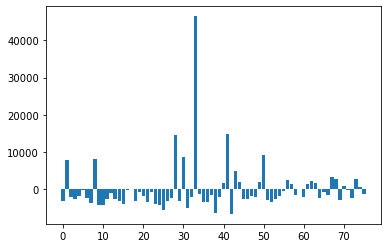

In [12]:
import matplotlib.pyplot as plt
model = pipe['linearregression']
importance = model.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [13]:
import joblib
joblib.dump(pipe, 'model.pkl')

['model.pkl']